In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import seaborn as sns
import random
import hypernetx as hnx
import os
import pickle

from GraphRicciCurvature.OllivierRicci import OllivierRicci

source_path = os.path.abspath("../utilities/")
sys.path.append(source_path)
import utils as ut
import centrality as central
import curvature as curv
import plotting as plt2

largest_number=15


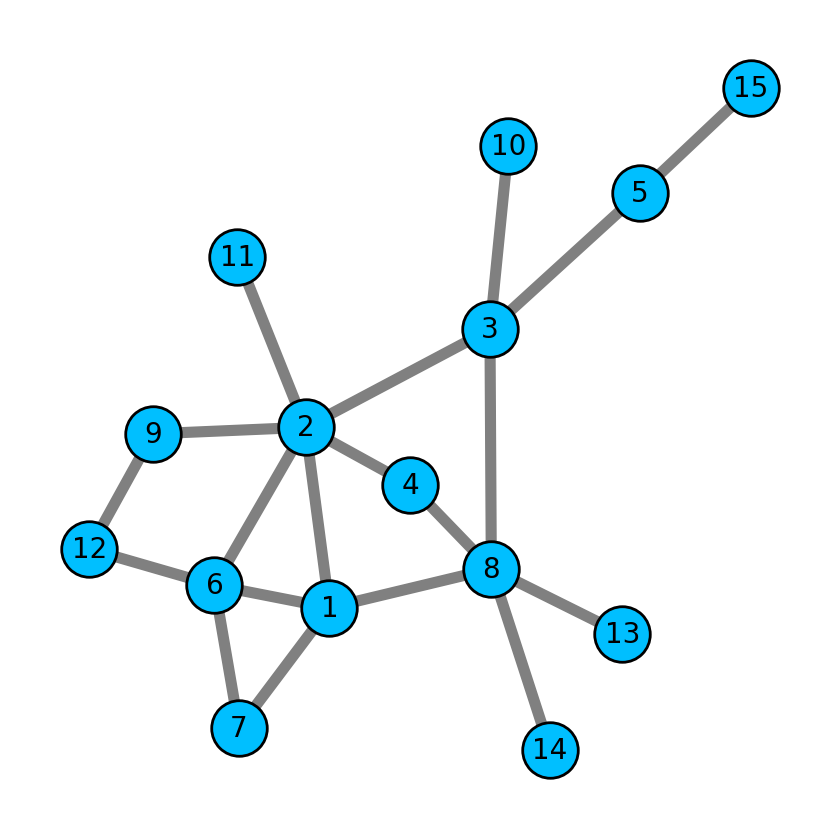

In [2]:
# Build graph
G = nx.Graph()
edges = [
    (1, 2),
    (1, 6),
    (1, 7),
    (1, 8),
    (2, 4),
    (2, 3),
    (2, 9),
    (2, 11),
    (3, 5),
    (2, 6),
    (3, 10),
    (4, 8),
    (6, 7),
    (6, 12),
    (8, 13),
    (8, 14),
    (5, 15),
    (12, 9),
    (8, 3),
]


G.add_edges_from(edges)

# Find largest number in the nodes
largest_number = max(G.nodes())
print(f"{largest_number=}")

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 4, 4

G.pos = nx.spring_layout(G, seed=1729)

nx.draw(
    G, 
    G.pos,
    node_size=400,
    node_color='deepskyblue',
    edgecolors='black', 
    linewidths=1.0,  
    width=4,
    edge_color='grey',
    with_labels=True,
    font_size=10,
)

plt.gcf().set_facecolor('none')

# Centralities

/tmp/ipykernel_687779/3003238410.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("bwr")


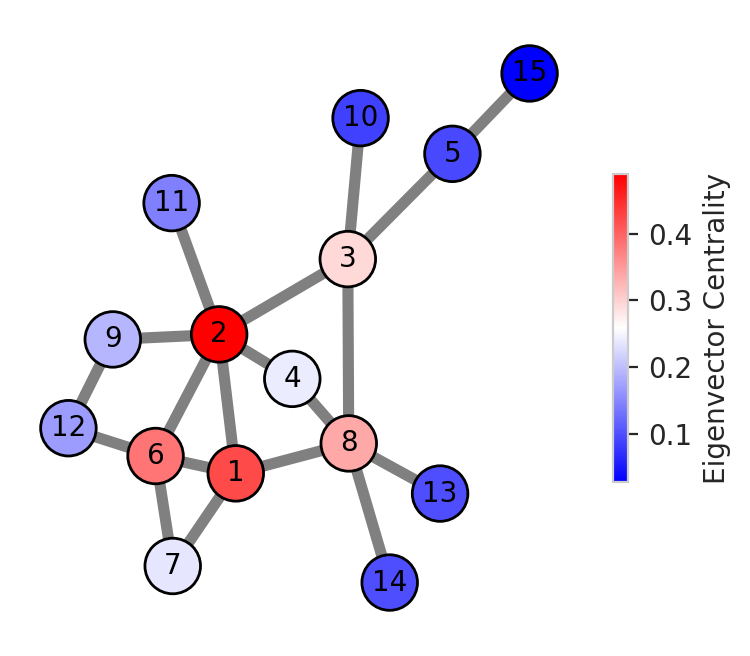

In [3]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 4.5, 4

# Compute eigenvector centrality
ec = nx.eigenvector_centrality(G)

# Normalize for colormap
vmin, vmax = min(ec.values()), max(ec.values())
norm = colors.Normalize(vmin=vmin, vmax=vmax)
cmap = cm.get_cmap("bwr")

# Map node colors
node_colors = [cmap(norm(ec[n])) for n in G.nodes()]


# Create figure and axes
fig, ax = plt.subplots()

# Plot
nx.draw(
    G,
    G.pos,
    node_size=400,
    node_color=node_colors,
    edgecolors='black',
    linewidths=1.0,
    width=4,
    edge_color='grey',
    with_labels=True,
    font_size=10
)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, shrink=0.5, label="Eigenvector Centrality")

plt.gcf().set_facecolor('none')
plt.show()

/tmp/ipykernel_687779/1293888039.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("bwr")


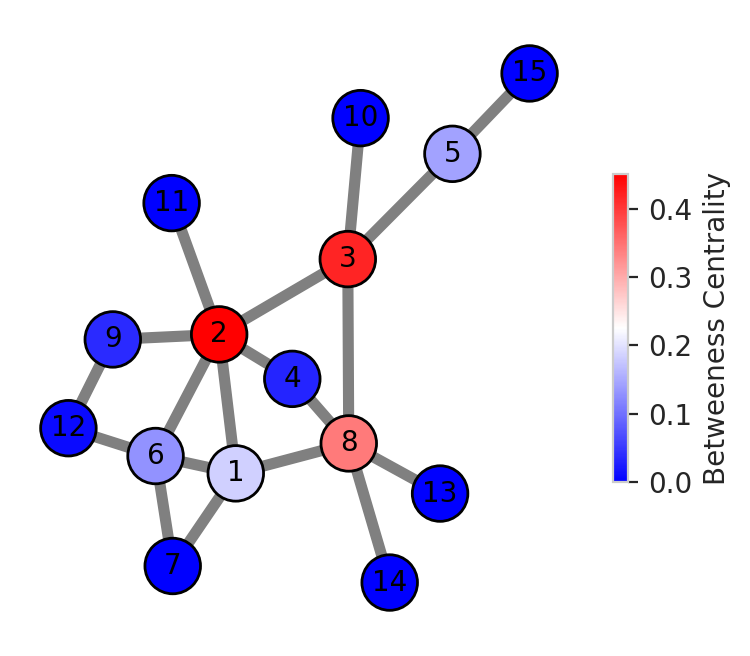

In [4]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 4.5, 4

# Compute eigenvector centrality
ec = nx.betweenness_centrality(G)

# Normalize for colormap
vmin, vmax = min(ec.values()), max(ec.values())
norm = colors.Normalize(vmin=vmin, vmax=vmax)
cmap = cm.get_cmap("bwr")

# Map node colors
node_colors = [cmap(norm(ec[n])) for n in G.nodes()]

# Create figure and axes
fig, ax = plt.subplots()

# Plot
nx.draw(
    G,
    G.pos,
    node_size=400,
    node_color=node_colors,
    edgecolors='black',
    linewidths=1.0,
    width=4,
    edge_color='grey',
    with_labels=True,
    font_size=10
)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, shrink=0.5, label="Betweeness Centrality")

plt.gcf().set_facecolor('none')
plt.show()

# Curvature

/nfs/turbo/umms-indikar/Cooper/conda_envs/rapids/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=687779) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/tmp/ipykernel_687779/406489255.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("coolwarm")  # diverging colormap


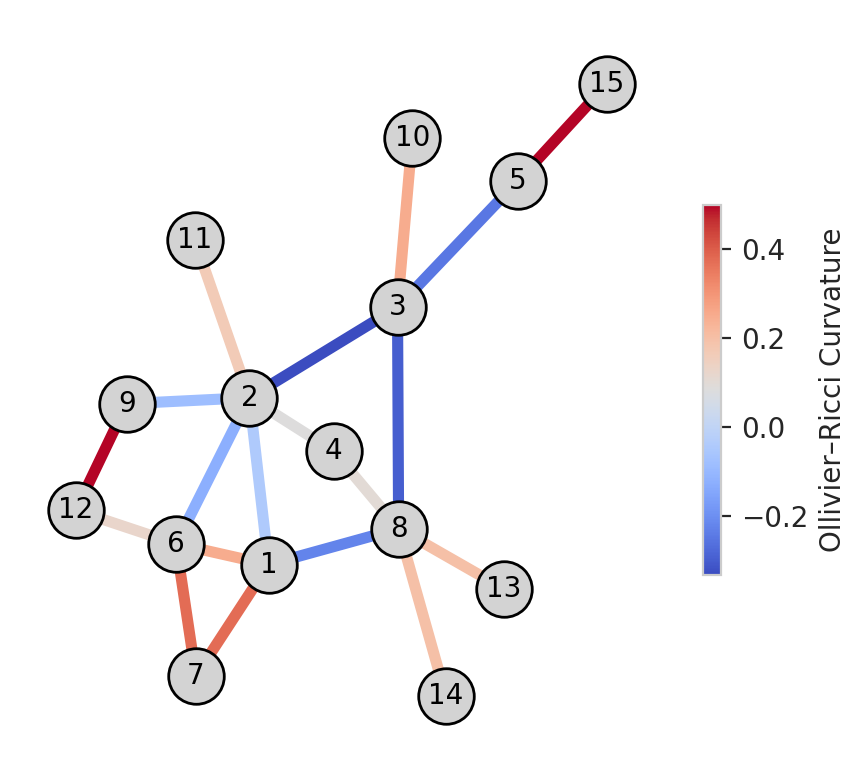

In [5]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (4.5, 4)

# Compute Ollivier–Ricci curvature
orc = OllivierRicci(G, alpha=0.5)
orc.compute_ricci_curvature()

# Extract curvature values for edges
key = 'ricciCurvature'
edge_curvatures = nx.get_edge_attributes(orc.G, key)

# Normalize for colormap
vmin, vmax = min(edge_curvatures.values()), max(edge_curvatures.values())
norm = colors.Normalize(vmin=vmin, vmax=vmax)
cmap = cm.get_cmap("coolwarm")  # diverging colormap

# Create figure and axes
fig, ax = plt.subplots()

# Draw nodes
nx.draw_networkx_nodes(
    G,
    G.pos,
    node_color="lightgray",
    edgecolors="black",
    node_size=400,
    ax=ax
)

# Draw edges with curvature colors
edge_colors = [cmap(norm(edge_curvatures[e])) for e in G.edges()]
nx.draw_networkx_edges(
    G,
    G.pos,
    edge_color=edge_colors,
    width=4,
    ax=ax
)

# Draw labels
nx.draw_networkx_labels(G, G.pos, font_size=10, ax=ax)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, shrink=0.5, label="Ollivier–Ricci Curvature")

# Final tweaks
ax.axis("off")
plt.gcf().set_facecolor('none')
plt.tight_layout()
plt.show()

# Hypergraph

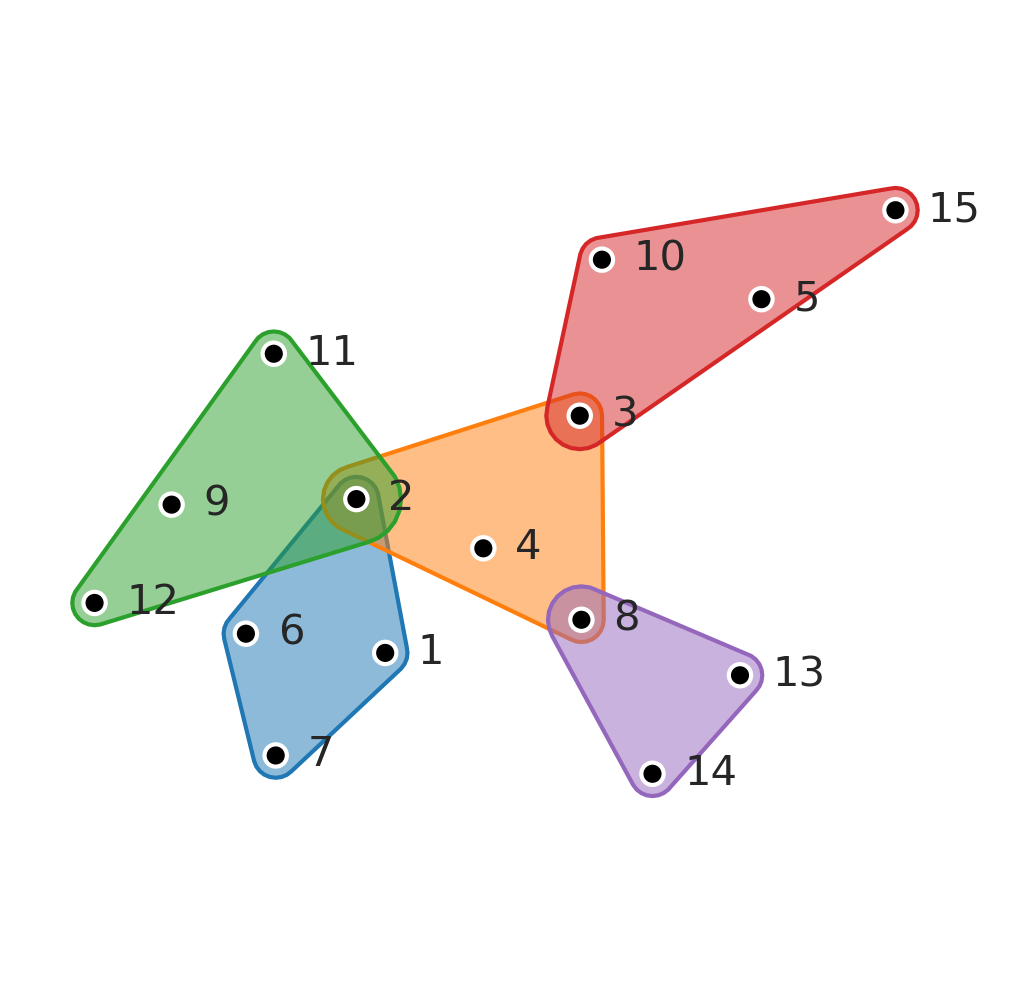

In [6]:
hyperedges = {
    1: {1, 2, 6, 7},        # cluster around node 1–2–6–7
    2: {2, 3, 4, 8},        # core connection 2–3–4–8
    3: {2, 9, 11, 12},      # branch from 2 to 9–11–12
    4: {3, 5, 10, 15},      # chain from 3 to 15
    5: {8, 13, 14},         # branch from 8 to 14
}  

# Create the HyperNetX hypergraph
H = hnx.Hypergraph(hyperedges)

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 4, 4

hnx.draw(
    H, 
    pos=G.pos, 
    fill_edges=True,
    node_label_alpha=0.0, 
    edge_label_alpha=0.0,
    with_edge_labels=False,
)

plt.gcf().set_facecolor('none')

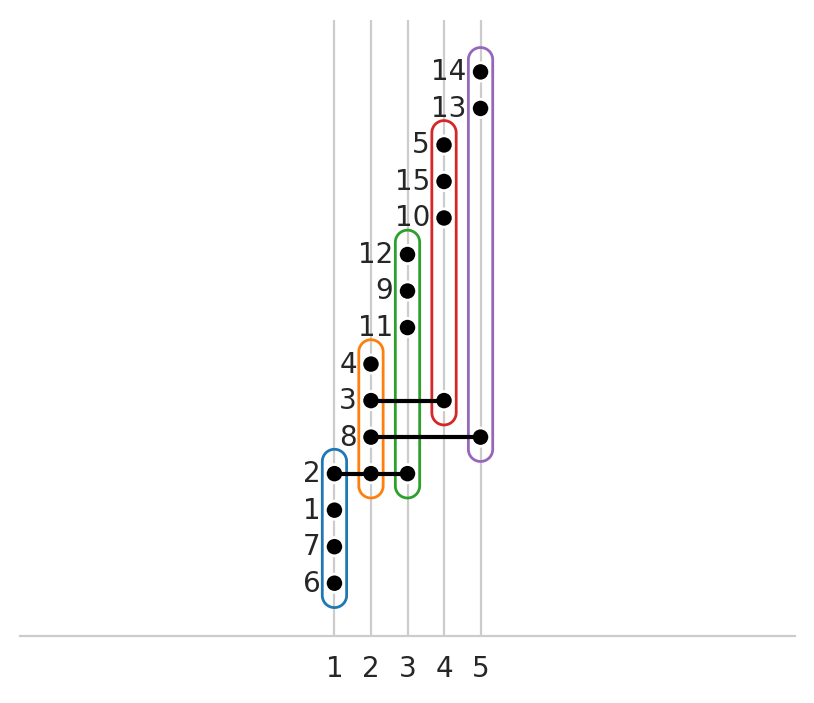

In [7]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 5, 4

hnx.draw_incidence_upset(H)

# Hypergraph Centrality

[0.23551563 0.30391381 0.23551563 0.13269115 0.09236377]


/tmp/ipykernel_687779/58641960.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("coolwarm")


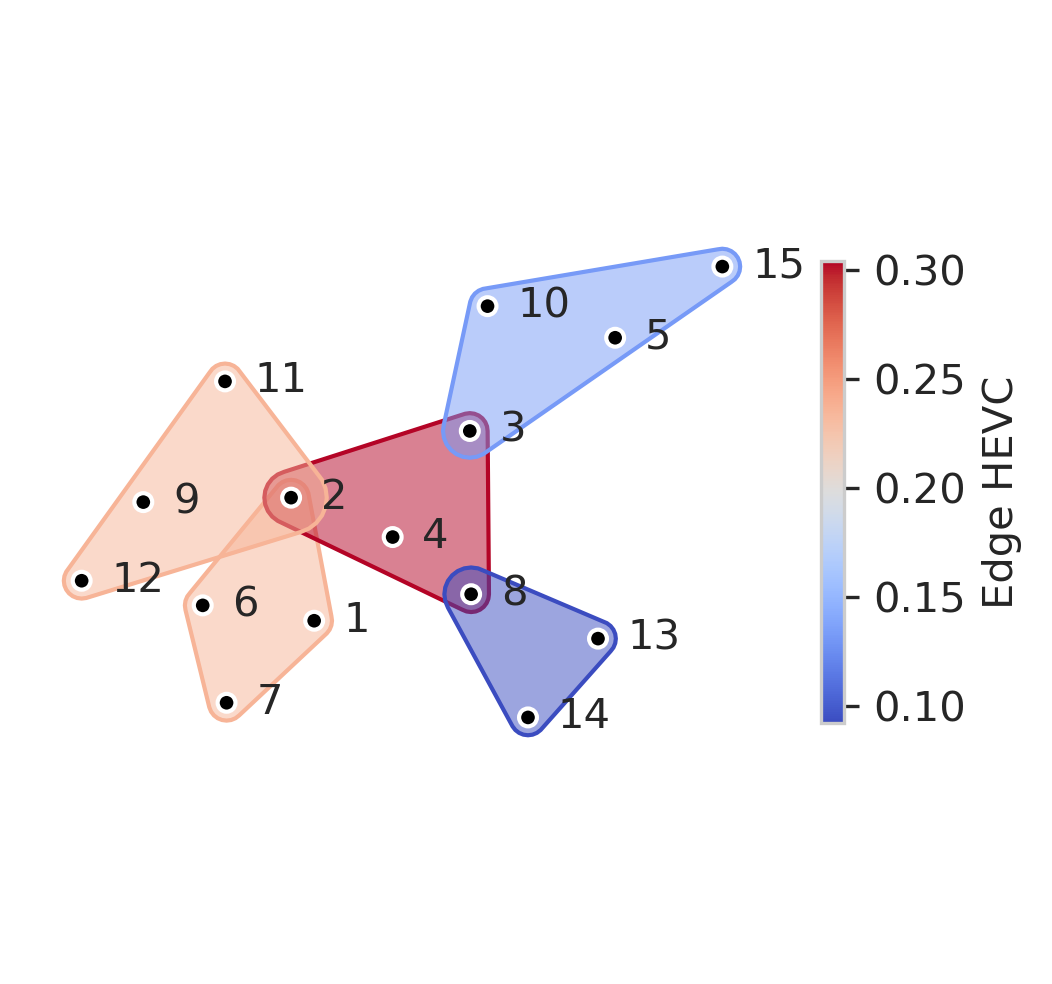

In [8]:
# Compute centralities
B = H.incidence_dataframe()
node_ev, edge_ev = central.hevc(B, function='linear')
print(edge_ev)

# Normalize edge_ev for colormap
vmin, vmax = np.min(edge_ev), np.max(edge_ev)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
cmap = cm.get_cmap("coolwarm")

# Create mapping from hyperedge IDs to color
edge_color_map = {
    e: cmap(norm(ev))
    for e, ev in zip(H.edges, edge_ev)
}

# Plot
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (4, 4)

# Create figure and axes
fig, ax = plt.subplots()

hnx.draw(
    H,
    pos=G.pos,
    fill_edges=True,
    node_label_alpha=0.0,
    edge_label_alpha=0.0,
    with_edge_labels=False,
    edges_kwargs={"color": [edge_color_map[e] for e in H.edges]}
)

# Optional colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, shrink=0.5, label="Edge HEVC")

plt.gcf().set_facecolor('none')
plt.show()

# Hypergraph Ricci Curvature

/tmp/ipykernel_687779/3289173128.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("coolwarm")


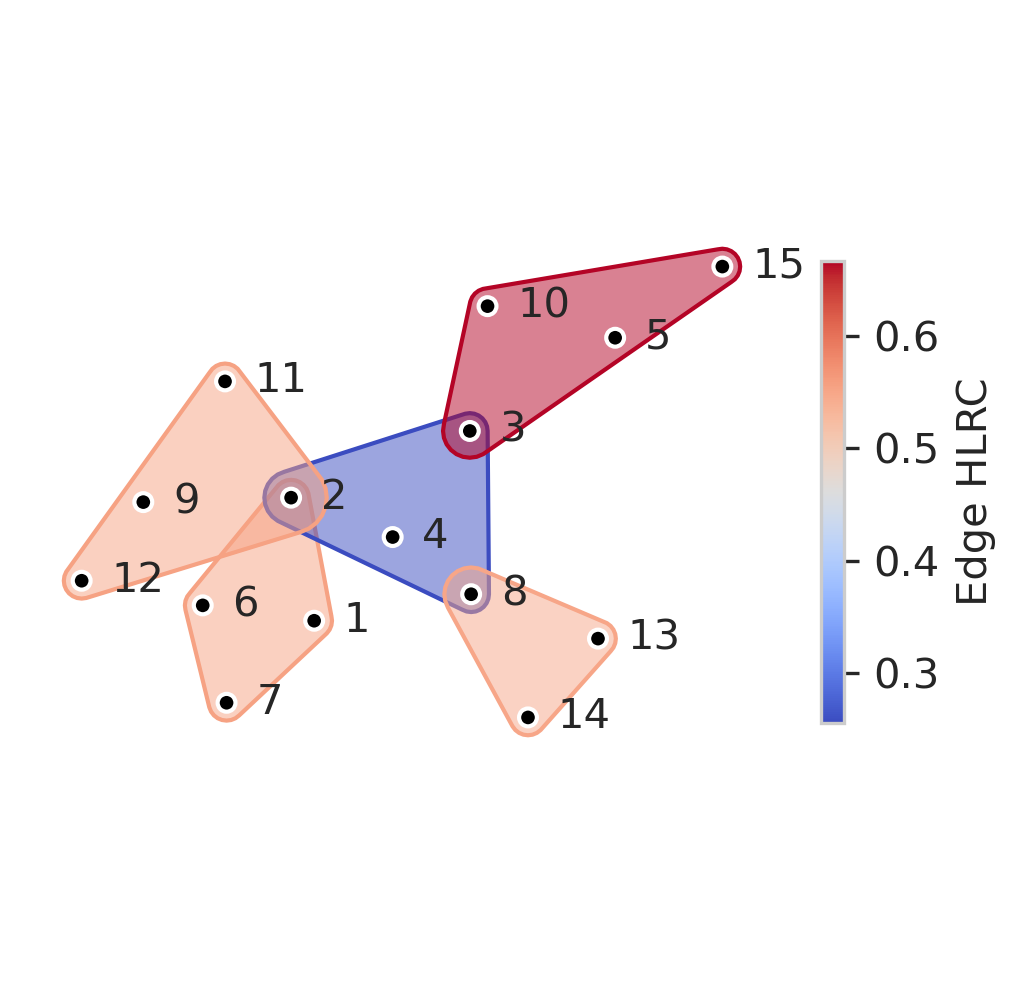

In [9]:
# Compute HLRC curvature
blist = ut.incidence_to_list_of_list(B)
hlrc = curv.compute_hlrc(blist)

# Normalize HLRC for colormap
vmin, vmax = np.nanmin(hlrc), np.nanmax(hlrc)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
cmap = cm.get_cmap("coolwarm")

# Map hyperedges to colors (handle NaN values if present)
edge_color_map = {
    e: cmap(norm(val)) if val is not None and not np.isnan(val) else (0.8, 0.8, 0.8, 1.0)
    for e, val in zip(H.edges, hlrc)
}

# Plot
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (4, 4)

fig, ax = plt.subplots()

hnx.draw(
    H,
    pos=G.pos,
    fill_edges=True,
    node_label_alpha=0.0,
    edge_label_alpha=0.0,
    with_edge_labels=False,
    edges_kwargs={"color": [edge_color_map[e] for e in H.edges]},
    ax=ax
)

# Colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, shrink=0.5, label="Edge HLRC")

plt.gcf().set_facecolor('none')
plt.show()

In [10]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)